In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import sklearn as skl
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn import metrics


In [2]:
df = pd.read_csv('DF/FMnist/fashion-mnist_train.csv', dtype=int) # read train data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
x = df.drop("label",axis = 1)
y = df.label

In [5]:
def random_forest(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix

    #fit
    model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
    model.fit(x_train, y_train)

    #test
    predict = model.predict(x_test)
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))

In [ ]:
def svm(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report, confusion_matrix

    # Instantiate SVM classifier using SGDClassifier
    svm = SGDClassifier(loss='hinge')

    #fit
    svm.fit(x_train, y_train)

    #test
    predict = svm.predict(x_test)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))
    print('Accuracy: %.3f' % accuracy_score(y_test, predict))

In [6]:
def naive(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import classification_report, confusion_matrix


    #fit
    model = GaussianNB()
    model.fit(x_train, y_train)

    #test
    predict = model.predict(x_test)
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))

In [7]:
def log_reg(x_train, x_test, y_train, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.linear_model import LogisticRegression


    #fit
    model = LogisticRegression()
    model.fit(x_train, y_train)

    #test
    predict = model.predict(x_test)
    con_mat = confusion_matrix(y_test, predict)
    sns.heatmap(con_mat, annot=True)
    print(classification_report(y_test, predict))

In [10]:
def decision_tree(x_train, x_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report, confusion_matrix

    #fit
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)

    #test
    predict = classifier.predict(x_test)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))

In [ ]:
def knn(x_train, x_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report, confusion_matrix

    #fit
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train_scaled, y_train)

    #test
    predict = classifier.predict(x_test_scaled)
    #con_mat = confusion_matrix(y_test,predict)
    #sns.heatmap(con_mat, annot=True)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [12]:
from sklearn.decomposition import PCA

#fit
pca= PCA(n_components=0.95)
x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)

In [13]:
#without pca
random_forest(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1189
           1       0.97      0.87      0.92      1189
           2       0.59      0.73      0.65      1204
           3       0.65      0.90      0.76      1260
           4       0.53      0.72      0.61      1208
           5       0.96      0.85      0.90      1188
           6       0.75      0.02      0.03      1195
           7       0.85      0.89      0.87      1160
           8       0.89      0.91      0.90      1210
           9       0.87      0.93      0.90      1197

    accuracy                           0.76     12000
   macro avg       0.78      0.76      0.73     12000
weighted avg       0.78      0.76      0.73     12000

[[ 940    9   53  152    2    2    3    0   28    0]
 [   0 1032   28  126    2    0    0    0    1    0]
 [  11    0  874   17  275    1    0    0   26    0]
 [  34    7   48 1140   25    0    2    0    4    0]
 [   2    4  159  156  874   

In [14]:
#with pca
random_forest(x_pca_train, x_pca_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1189
           1       0.97      0.91      0.94      1189
           2       0.67      0.70      0.69      1204
           3       0.77      0.83      0.80      1260
           4       0.63      0.68      0.66      1208
           5       0.74      0.80      0.77      1188
           6       0.64      0.29      0.40      1195
           7       0.83      0.83      0.83      1160
           8       0.82      0.91      0.86      1210
           9       0.88      0.89      0.88      1197

    accuracy                           0.76     12000
   macro avg       0.76      0.76      0.75     12000
weighted avg       0.76      0.76      0.75     12000

[[ 943    7   13  124    8   27   21    1   40    5]
 [  13 1087   24   52    9    2    2    0    0    0]
 [  46    0  845    7  186   22   54    0   44    0]
 [  66   19    2 1044   74   10   38    0    4    3]
 [  12    2  196   58  820   

In [15]:
#without pca
naive(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1189
           1       0.66      0.94      0.78      1189
           2       0.58      0.34      0.43      1204
           3       0.45      0.61      0.52      1260
           4       0.38      0.74      0.50      1208
           5       0.86      0.28      0.42      1188
           6       0.31      0.04      0.06      1195
           7       0.50      0.97      0.66      1160
           8       0.85      0.72      0.78      1210
           9       0.94      0.68      0.79      1197

    accuracy                           0.59     12000
   macro avg       0.64      0.59      0.56     12000
weighted avg       0.64      0.59      0.56     12000

[[ 729   50   37  229   87    1   25    0   31    0]
 [   2 1117   12   43    3    0   11    0    1    0]
 [   2   10  409   87  651    0   15    0   30    0]
 [   5  427    6  772   40    0    8    0    2    0]
 [   1   42   55  206  890   

In [16]:
#with pca
naive(x_pca_train, x_pca_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1189
           1       0.93      0.89      0.91      1189
           2       0.72      0.67      0.69      1204
           3       0.80      0.75      0.77      1260
           4       0.72      0.67      0.69      1208
           5       0.77      0.74      0.76      1188
           6       0.54      0.45      0.49      1195
           7       0.74      0.85      0.79      1160
           8       0.59      0.84      0.69      1210
           9       0.93      0.84      0.88      1197

    accuracy                           0.74     12000
   macro avg       0.75      0.74      0.74     12000
weighted avg       0.75      0.74      0.74     12000

[[ 866    4   18   63    4    8   74    0  152    0]
 [   8 1056   12   57    1    4   13    0   38    0]
 [  26    0  801    6  155   19  106    0   91    0]
 [  64   68   10  939   41   24   42    0   72    0]
 [   8    3  114   59  804   

/home/pequeno/pythonProject/Project/Mnist_Hands/lib64/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.97      0.97      0.97      1189
           2       0.74      0.78      0.76      1204
           3       0.86      0.87      0.86      1260
           4       0.73      0.78      0.75      1208
           5       0.94      0.90      0.92      1188
           6       0.66      0.55      0.60      1195
           7       0.91      0.93      0.92      1160
           8       0.93      0.94      0.93      1210
           9       0.93      0.94      0.93      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



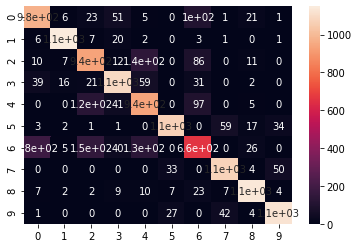

In [17]:
#without pca
log_reg(x_train, x_test, y_train, y_test)

/home/pequeno/pythonProject/Project/Mnist_Hands/lib64/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1189
           1       0.98      0.97      0.97      1189
           2       0.74      0.77      0.75      1204
           3       0.87      0.87      0.87      1260
           4       0.76      0.77      0.76      1208
           5       0.93      0.94      0.94      1188
           6       0.64      0.58      0.61      1195
           7       0.91      0.91      0.91      1160
           8       0.95      0.94      0.94      1210
           9       0.94      0.95      0.94      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



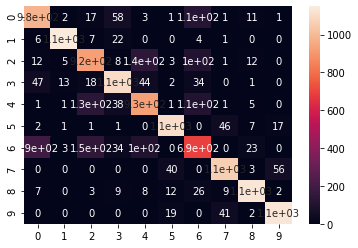

In [25]:
#with pca
log_reg(x_pca_train, x_pca_test, y_train, y_test)

In [18]:
#without pca
svm(x_train, x_test, y_train, y_test)

[[ 933    3    2  115   24    0   96    0   16    0]
 [  13 1112    0   34   20    0    9    1    0    0]
 [  35    1  230   18  646    0  262    0   12    0]
 [  31    8    1 1124   73    0   20    1    1    1]
 [   2    0    1   47 1079    0   73    0    6    0]
 [   4    3    0    5    0 1006    3   94   40   33]
 [ 193    3   17   90  271    0  591    0   30    0]
 [   0    0    0    1    0   13    1 1116    7   22]
 [  11    1    1   28   19    4   22    6 1116    2]
 [   0    0    0    2    1   22    0   71    4 1097]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1189
           1       0.98      0.94      0.96      1189
           2       0.91      0.19      0.32      1204
           3       0.77      0.89      0.83      1260
           4       0.51      0.89      0.65      1208
           5       0.96      0.85      0.90      1188
           6       0.55      0.49      0.52      1195
           7       0.87      0.96   

In [19]:
#with pca
svm(x_pca_train, x_pca_test, y_train, y_test)

[[ 905   14   50   37   19    8  130    2   22    2]
 [   2 1151    4   18    8    0    5    1    0    0]
 [  10   10  744   10  237   10  171    2   10    0]
 [  46   21   43  984  108    2   52    1    2    1]
 [   4    3   74   19  982    4  115    1    6    0]
 [   1    2    1    2    0 1162    0    9    3    8]
 [ 169   11  183   28  167   10  597    1   28    1]
 [   0    0    0    0    0  271    0  819    2   68]
 [  10    3   76   30    8   26   19    7 1024    7]
 [   0    3    0    0    0   78    0   24    0 1092]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1189
           1       0.94      0.97      0.96      1189
           2       0.63      0.62      0.63      1204
           3       0.87      0.78      0.82      1260
           4       0.64      0.81      0.72      1208
           5       0.74      0.98      0.84      1188
           6       0.55      0.50      0.52      1195
           7       0.94      0.71   

In [20]:
#without pca
#knn(x_train, x_test, y_train, y_test)

In [21]:
#with pca
#knn(x_train, x_test, y_train, y_test)

In [22]:
#without pca
decision_tree(x_train, x_test, y_train, y_test)

[[ 902    7   34   63    6    3  160    1   12    1]
 [   7 1126    5   31    5    0   10    0    5    0]
 [  23    4  839   12  169    2  144    0   11    0]
 [  54   39   21 1007   63    2   59    1   13    1]
 [   6    3  180   69  810    2  129    0    9    0]
 [   1    1    4    2    1 1056    1   71   15   36]
 [ 188    9  153   49  140    2  630    1   21    2]
 [   0    0    0    0    0   59    0 1014    6   81]
 [  14    2   15   10   14   17   28   12 1091    7]
 [   0    0    4    0    2   32    1   69    4 1085]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1189
           1       0.95      0.95      0.95      1189
           2       0.67      0.70      0.68      1204
           3       0.81      0.80      0.80      1260
           4       0.67      0.67      0.67      1208
           5       0.90      0.89      0.89      1188
           6       0.54      0.53      0.53      1195
           7       0.87      0.87   

In [23]:
#with pca
decision_tree(x_train, x_test, y_train, y_test)

[[ 898    5   29   68   11    3  163    1   10    1]
 [   7 1120    6   31    6    0   16    0    3    0]
 [  22    2  820   16  172    2  154    0   15    1]
 [  51   37   26  995   72    1   66    0   11    1]
 [   8    3  181   62  811    1  132    0   10    0]
 [   2    1    0    1    2 1068    5   63   11   35]
 [ 187    9  164   39  134    4  631    1   26    0]
 [   0    0    0    0    0   64    0 1012    4   80]
 [  10    3   17   15   16   16   31   12 1083    7]
 [   0    1    4    0    1   29    0   74    4 1084]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1189
           1       0.95      0.94      0.95      1189
           2       0.66      0.68      0.67      1204
           3       0.81      0.79      0.80      1260
           4       0.66      0.67      0.67      1208
           5       0.90      0.90      0.90      1188
           6       0.53      0.53      0.53      1195
           7       0.87      0.87   